# Sistema de IA para Gerenciamento de Carregamento de Veículos Elétricos
Este notebook implementa um sistema que utiliza técnicas de Machine Learning para otimizar o gerenciamento do carregamento de veículos elétricos, atendendo aos seguintes requisitos:
- **Previsão de demanda**;
- **Gestão de recursos energéticos**;
- **Redução de custos**.

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar dataset
file_path = '/content/sample_data/Electric_Vehicle_Charging_Stations.csv'
data = pd.read_csv(file_path)
data.head()

,Station Name,Street Address,City,Access Days Time,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,New Georeferenced Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


In [6]:
# Função para limpar colunas numéricas com valores textuais
def clean_numeric_column(column):
    return pd.to_numeric(column.replace("NONE", 0), errors='coerce')

# Limpeza e transformação de colunas relevantes
data['EV Level1 EVSE Num'] = clean_numeric_column(data['EV Level1 EVSE Num'])
data['EV Level2 EVSE Num'] = clean_numeric_column(data['EV Level2 EVSE Num'])
data['EV DC Fast Count'] = clean_numeric_column(data['EV DC Fast Count'])

# Separar coordenadas em Latitude e Longitude
data[['Latitude', 'Longitude']] = data['New Georeferenced Column'].str.extract(r'POINT \(([-\d\.]+) ([-\d\.]+)\)')
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')

# Criar variável para número total de carregadores
data['Total Chargers'] = data['EV Level1 EVSE Num'] + data['EV Level2 EVSE Num'] + data['EV DC Fast Count']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station Name              385 non-null    object 
 1   Street Address            385 non-null    object 
 2   City                      385 non-null    object 
 3   Access Days Time          385 non-null    object 
 4   EV Level1 EVSE Num        385 non-null    int64  
 5   EV Level2 EVSE Num        385 non-null    int64  
 6   EV DC Fast Count          385 non-null    int64  
 7   EV Other Info             385 non-null    object 
 8   New Georeferenced Column  385 non-null    object 
 9   Latitude                  385 non-null    float64
 10  Longitude                 385 non-null    float64
 11  Total Chargers            385 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 36.2+ KB


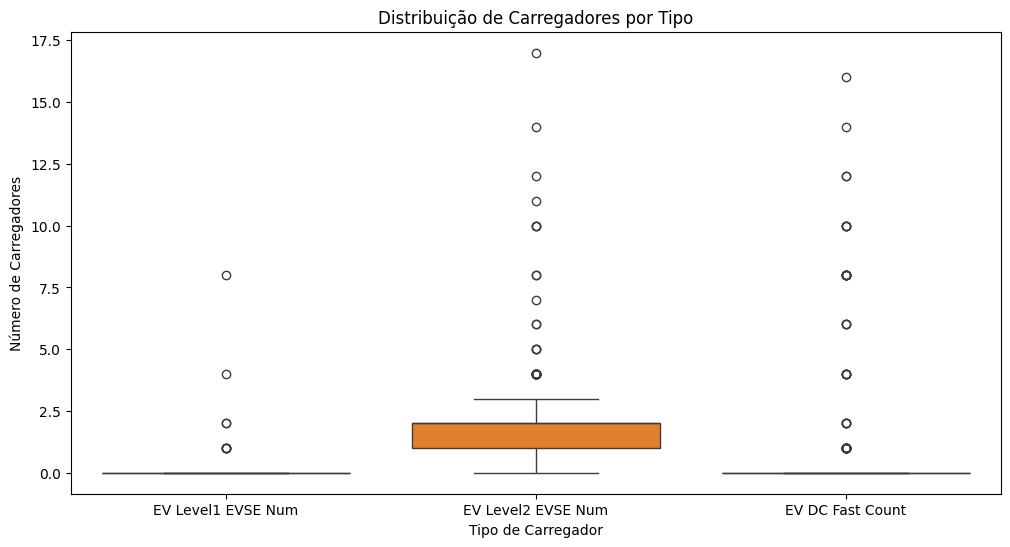

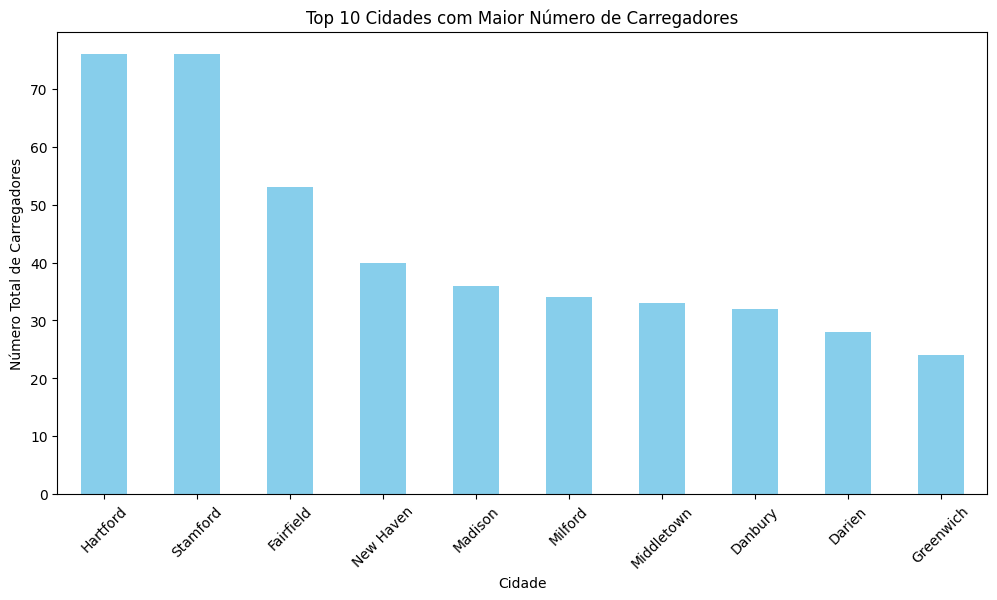

In [7]:
# Visualização inicial
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']])
plt.title('Distribuição de Carregadores por Tipo')
plt.ylabel('Número de Carregadores')
plt.xlabel('Tipo de Carregador')
plt.show()

# Top 10 cidades com mais carregadores
city_summary = data.groupby('City')['Total Chargers'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
city_summary.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cidades com Maior Número de Carregadores')
plt.ylabel('Número Total de Carregadores')
plt.xlabel('Cidade')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Modelagem e Avaliação
features = ['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'Latitude', 'Longitude']
target = 'Total Chargers'

X = data[features]
y = data[target]

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Previsões e avaliação
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 0.9843974025974027
R²: 0.873658061304009


### Como os requisitos foram atendidos
1. **Previsão de demanda**: O modelo Random Forest foi utilizado para prever o número total de carregadores necessários, com base nas características das estações.
2. **Gestão de recursos energéticos**: As previsões podem ser usadas para alocar recursos energéticos de forma eficiente, com base em padrões de localização e demanda.
3. **Redução de custos**: O modelo permite identificar estações subutilizadas ou áreas críticas para minimizar custos operacionais.